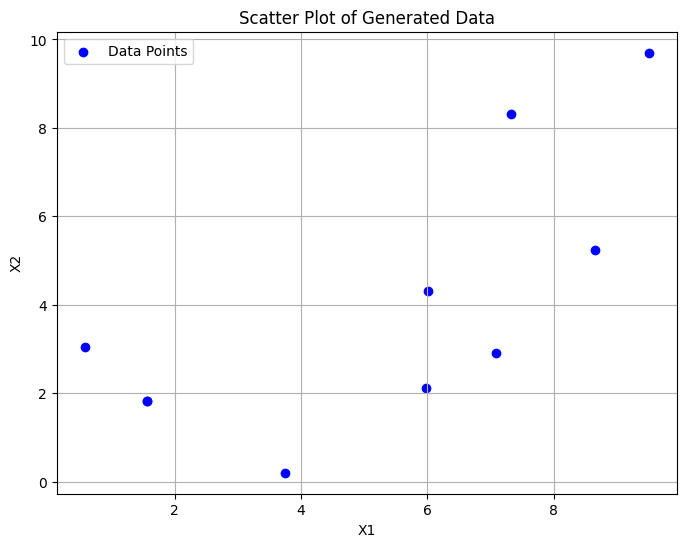

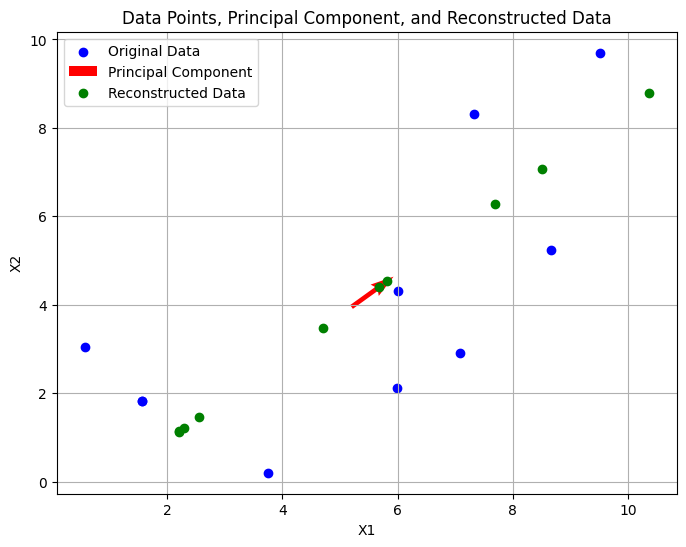

(array([16.29939262,  2.82051577]),
 array([[ 0.72866233, -0.68487313],
        [ 0.68487313,  0.72866233]]),
 array([-3.62701328,  7.0730253 ,  4.5378164 , -0.68067132, -4.1150043 ]),
 array([[-2.64286795, -2.48404394],
        [ 5.15384711,  4.84412499],
        [ 3.30653588,  3.10782853],
        [-0.49597955, -0.4661735 ],
        [-2.99844862, -2.81825588]]))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset Generation
np.random.seed(42)  # For reproducibility
X1 = np.random.uniform(0, 10, 10)
X2 = np.random.uniform(0, 10, 10)

# Combine the features into a dataset
data = np.vstack((X1, X2)).T

# 2. Data Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, color='blue', label='Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Generated Data')
plt.grid(True)
plt.legend()
plt.show()

# 3. Mean Centering
X1_mean = np.mean(X1)
X2_mean = np.mean(X2)

X1_centered = X1 - X1_mean
X2_centered = X2 - X2_mean

centered_data = np.vstack((X1_centered, X2_centered)).T

# 4. Covariance Matrix Calculation
cov_matrix = np.cov(centered_data.T)

# 5. Eigenvector and Eigenvalue Computation
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 6. Principal Component Selection
# The eigenvector corresponding to the largest eigenvalue is the principal component
principal_component = eigenvectors[:, np.argmax(eigenvalues)]

# 7. Dimensionality Reduction (Projecting onto the principal component)
projection = centered_data.dot(principal_component)

# 8. Data Reconstruction
reconstructed_data = projection[:, np.newaxis] * principal_component

# 9. Visualization of Results
plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, color='blue', label='Original Data')
plt.quiver(X1_mean, X2_mean, principal_component[0], principal_component[1], angles='xy', scale_units='xy', scale=1, color='red', label='Principal Component')
plt.scatter(reconstructed_data[:, 0] + X1_mean, reconstructed_data[:, 1] + X2_mean, color='green', label='Reconstructed Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points, Principal Component, and Reconstructed Data')
plt.grid(True)
plt.legend()
plt.show()

# 10. Reflection
# PCA helped in reducing dimensionality from 2D to 1D by projecting data onto the principal component.
# While doing so, we preserved the maximum variance along the principal axis. This is useful for visualization, noise reduction, and feature extraction.

eigenvalues, eigenvectors, projection[:5], reconstructed_data[:5]  # Displaying partial results for reference
